# Machine Learning Step by Step

<b>Last two days while through all the Packages, it can feel like you have the individual pieces, but don’t quite know how to put them together. Taking the next step and solving a complete machine learning problem can be daunting, but preserving and completing a first project will give you the confidence to tackle any ML problem. </b>

Now, we will walk through a complete machine learning solution with a real-world dataset to let you see how all the pieces come together.

### ML & AI is combination of 
#### T : Task  |  E : Experience |  P : Performance
: Either by Use Cases / Questions need to Answer > T 


: To Compelte the task you need previous Experience > E


: To accomplish the task you need to evaluate or Use the Performance > P 

<b>We’ll follow the general Machine Learning workflow step-by-step:</b>

* Data cleaning and formatting
* Exploratory data analysis
* Feature engineering and selection
* Compare several machine learning models on a performance metric
* Perform hyperparameter tuning on the best model
* Evaluate the best model on the testing set
* Interpret the model results
* Draw conclusions and document work

# Problem Definition

The first step before we get coding is to understand the problem we are trying to solve and the available data. In this project, we will work with publicly available [building energy data from New York City.](https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml)

#### The objective is to use the energy data to build a model that can predict the Energy Star Score of a building and interpret the results to find the factors which influence the score.

The data includes the Energy Star Score, which makes this a supervised regression machine learning task:
* <b>Supervised</b>: we have access to both the features and the target and our goal is to train a model that can learn a mapping between the two
* <b>Regression</b>: The Energy Star score is a continuous variable

## The Goal

We want to develop a model that is both <br>
<b>accurate</b> — it can predict the `Energy Star Score` close to the true value, and <br><b>interpretable</b> — we can understand the model predictions. <br>Once we know the goal, we can use it to guide our decisions as we dig into the data and build models.

# 1. Data Cleaning

Real-world data is messy which means we need to clean and wrangle it into an acceptable format before we can even start the analysis. Data cleaning is an un-glamorous, but necessary part of most actual ML problems.

In [1]:
#import necessary packages 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read in data into a dataframe

In [4]:
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

In [5]:
# Display top of dataframe

In [6]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [7]:
# See all columns list
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

#### `ISSUE 1`

<b>This is a subset of the full data which contains 60 columns. Already, we can see a couple issues: first, we know that we want to predict the ENERGY STAR Score but we don’t know what any of the columns mean. While this isn’t necessarily an issue — we can often make an accurate model without any knowledge of the variables — we want to focus on interpretability, and it might be important to understand at least some of the columns.</b>

[Here](http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf) is the all the definitions of the columns.<br>


We don’t need to study all of the columns, but we should at least understand the `Energy Star Score`, which is described as:
<b>A 1-to-100 percentile ranking based on self-reported energy usage for the reporting year. The Energy Star score is a relative measure used for comparing the energy efficiency of buildings.</b>

#### `ISSUE 2`

<b>That clears up the first problem, but the second issue is that missing values are encoded as “Not Available”.</b>

In [8]:
# see that ENERGY STAR Score column
data['ENERGY STAR Score'].head()

0    Not Available
1               55
2    Not Available
3    Not Available
4    Not Available
Name: ENERGY STAR Score, dtype: object

In [9]:
# Check with info for the dataframe : 
# It also give us an understanding about missing values for entire Dataset


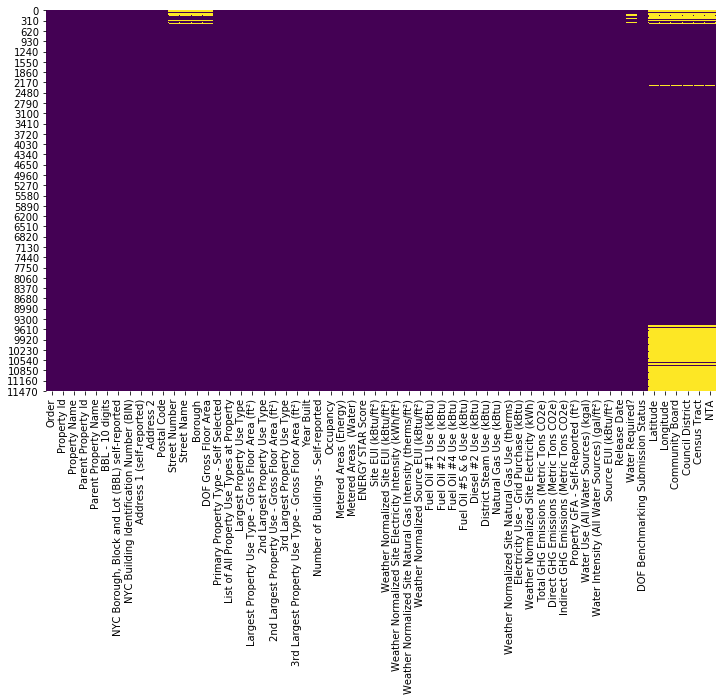

In [10]:
# Use Seaborn Heatmap to see the Missing Values from Dataset
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(),cbar = False, cmap='viridis')

<b>This is a string in Python which means that even the columns with `numbers` will be stored as `object datatypes` because Pandas converts a column with any strings into a column of all strings. </b>

<b>We can’t do numerical analysis on strings, so these will have to be `converted to number (specifically float) data types`!</b>

### `HOW TO SOLVE`

<b>Replaces all the “Not Available” entries with not a number ( np.nan), which can be interpreted as numbers, and then converts the relevant columns to the float datatype. Once the correct columns are numbers, we can start to investigate the data.</b>

In [11]:
# Replace all occurrences of Not Available with numpy not a number (for entire Dataset)
data = data.replace({'Not Available':np.nan})

In [12]:
#data.columns

In [13]:
# Iterate through the columns
for col in list(data.columns) :
    # Select columns that should be numeric (ft²,kBtu,Metric Tons CO2e,kWh,therms,gal,Score)
    if('ft²' in col or 'kBtu' in col or  
       'Metric Tons CO2e' in col or  'kWh' in col or  
       'therms' in col or  'gal' in col or 'Score' in col):
     # Convert the data type to float
        data[col] = data[col].astype(float)      
    

#### Missing Data

In [14]:
# Find Total Missing Value and put that into a DataFrame
mis_val = pd.DataFrame(data.isnull().sum())
mis_val

,0
Order,0
Property Id,0
Property Name,0
Parent Property Id,0
Parent Property Name,0
BBL - 10 digits,11
"NYC Borough, Block and Lot (BBL) self-reported",11
NYC Building Identification Number (BIN),162
Address 1 (self-reported),0
Address 2,11539


In [15]:
# Rename the DataFrame Column as 'Total Missing Values' and Sort as Descending Order
mis_val.rename(columns={0:'Total Missing Value'},inplace=True)
mis_val.sort_values(by='Total Missing Value',ascending=False)

,Total Missing Value
Fuel Oil #1 Use (kBtu),11737
Diesel #2 Use (kBtu),11730
Address 2,11539
Fuel Oil #5 & 6 Use (kBtu),11152
District Steam Use (kBtu),10810
Fuel Oil #4 Use (kBtu),10425
3rd Largest Property Use Type - Gross Floor Area (ft²),10262
3rd Largest Property Use Type,10262
Fuel Oil #2 Use (kBtu),9165
2nd Largest Property Use - Gross Floor Area (ft²),8005


In [16]:
mis_val.head()

,Total Missing Value
Order,0
Property Id,0
Property Name,0
Parent Property Id,0
Parent Property Name,0


In [17]:
# Find Percentage of missing values & Make a DataFrame
mis_val_percent = pd.DataFrame(data.isnull().sum()*100/len(data))
mis_val_percent.rename(columns={0:'% Missing Values'},inplace=True)

In [18]:
# Sort as Descending Order for Missing Value Percent
mis_val_percent.sort_values(by='% Missing Values',ascending=False)

,% Missing Values
Fuel Oil #1 Use (kBtu),99.923378
Diesel #2 Use (kBtu),99.863783
Address 2,98.237698
Fuel Oil #5 & 6 Use (kBtu),94.942959
District Steam Use (kBtu),92.031330
Fuel Oil #4 Use (kBtu),88.753618
3rd Largest Property Use Type - Gross Floor Area (ft²),87.365912
3rd Largest Property Use Type,87.365912
Fuel Oil #2 Use (kBtu),78.026562
2nd Largest Property Use - Gross Floor Area (ft²),68.150860


In [19]:
# Concate two dataframe (Column wise)
mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
mis_df = mis_val_table.sort_values(by='% Missing Values',ascending=False)
mis_df.head()

,Total Missing Value,% Missing Values
Fuel Oil #1 Use (kBtu),11737,99.923378
Diesel #2 Use (kBtu),11730,99.863783
Address 2,11539,98.237698
Fuel Oil #5 & 6 Use (kBtu),11152,94.942959
District Steam Use (kBtu),10810,92.031330


While we always want to be careful about removing information, if a column has a `high percentage of missing values`, then it probably `will not be useful` to our model. The threshold for removing columns should depend on the problem , and for this project, we will remove any columns with more than 50% missing values.

In [20]:
# Get the columns with > 50% missing Values 
mis_df[mis_df['% Missing Values']>50]

,Total Missing Value,% Missing Values
Fuel Oil #1 Use (kBtu),11737,99.923378
Diesel #2 Use (kBtu),11730,99.863783
Address 2,11539,98.237698
Fuel Oil #5 & 6 Use (kBtu),11152,94.942959
District Steam Use (kBtu),10810,92.031330
Fuel Oil #4 Use (kBtu),10425,88.753618
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.365912
3rd Largest Property Use Type,10262,87.365912
Fuel Oil #2 Use (kBtu),9165,78.026562
2nd Largest Property Use - Gross Floor Area (ft²),8005,68.150860


In [21]:
# Drop the Columns which have > 50% missing Values (Don't forget to Do inplace)
mis_col = list(mis_df[mis_df['% Missing Values']>50].index)
mis_col

['Fuel Oil #1 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Address 2',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'District Steam Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 'Fuel Oil #2 Use (kBtu)',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '2nd Largest Property Use Type']

In [22]:
data.drop(mis_col,axis=1,inplace=True)

In [23]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


#### The rest of the missing values will have to be imputed (filled-in) using an appropriate strategy before doing machine learning.

# 2. Exploratory Data Analysis

In [24]:
# pip install plotly
# pip install cufflinks
import cufflinks as cf
cf.go_offline()

Now that the tedious — but necessary — step of data cleaning is complete, we can move on to exploring our data! `Exploratory Data Analysis (EDA)` is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data.

In short, the goal of EDA is to learn what our data can tell us. It generally `starts out with a high level overview`, then narrows in to specific areas as we find interesting parts of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by `helping us decide which features to use`.

#### Single Variable Plots

The goal is to predict the `Energy Star Score` so a reasonable place to start is examining the distribution of this variable. A histogram is a simple yet effective way to visualize the distribution of a single variable

In [25]:
# Draw a histogram for 'ENERGY STAR Score'
data['ENERGY STAR Score'].iplot(kind='hist',xTitle='Energy Score',
                                yTitle='Number of Buildings',
                                title='Energy Star Score Distrubution')

This looks quite `suspicious`! The Energy Star score is a percentile rank, which means we would expect to see a uniform distribution, with each score assigned to the same number of buildings. However, a disproportionate number of buildings have either the highest, 100, or the lowest, 1, score (higher is better for the Energy Star score).

If we go back to the `definition` of the score, we see that it is based on `“self-reported energy usage”` which might explain the very high scores. Asking building owners to report their own energy usage is like asking students to report their own scores on a test! As a result, this probably is not the most objective measure of a building’s energy efficiency.

To contrast the Energy Star Score, we can look at the `Energy Use Intensity (EUI)`, which is the `total energy use` divided by the `square footage of the building`. <br>Here the energy usage is not self-reported, so this could be a more objective measure of the energy efficiency of a building. Moreover, this is not a percentile rank, so the absolute values are important and we would expect them to be approximately normally distributed with perhaps a few outliers on the low or high end.

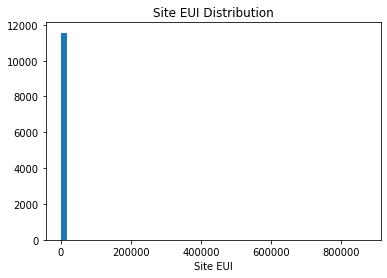

In [26]:
# Draw a histogram for 'Site EUI (kBtu/ft²)'
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(),bins=50)
plt.xlabel('Site EUI')
plt.title('Site EUI Distribution')

data['Site EUI (kBtu/ft²)'].iplot(kind='hist',bins=100)

Well this shows us we have another problem: `outliers!` The graph is incredibly skewed because of the presence of a few buildings with very high scores. It looks like we will have to take a slight detour to deal with the outliers. Let's look at the stats for this feature.

In [27]:
# See the Descriptive Statistics Report for 'Site EUI (kBtu/ft²)'
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [28]:
# Sort Values for 'Site EUI (kBtu/ft²)' and 
# see lower-end data to see is there any outlier in the Data Column or Not!
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

Wow! `One building` is clearly far above the rest.

In [29]:
# Find that Particular building Information
data[data['Site EUI (kBtu/ft²)']==869265].transpose()

,8068
Order,9984
Property Id,4414323
Property Name,234 Skillman
Parent Property Id,Not Applicable: Standalone Property
Parent Property Name,Not Applicable: Standalone Property
BBL - 10 digits,3028937502
"NYC Borough, Block and Lot (BBL) self-reported",3028937502
NYC Building Identification Number (BIN),"3390250 , 3338313"
Address 1 (self-reported),234 Skillman avenue
Postal Code,11211


It might be worthwhile for someone to `follow up with this building owner!` However, that is not our problem and we only need to figure out how to handle this information. <br>Outliers can occur for many reasons: typos, malfunctions in measuring devices, incorrect units, or they can be legitimate but extreme values. Outliers can throw off a model because they are not indicative of the actual distribution of data.

#### Removing Outliers

When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate. When removing outliers, we try to be as conservative as possible, using the definition of an [extreme outlier](https://people.richland.edu/james/lecture/m170/ch03-pos.html):<br>

* On the low end, an extreme outlier is below $\text{First Quartile} -3 * \text{Interquartile Range}$
* On the high end, an extreme outlier is above $\text{Third Quartile} + 3 * \text{Interquartile Range}$
<br><br>In this case, we will only remove the single outlying point and see how the distribution looks.

In [30]:
# Calculate first and third quartile
fq = data['Site EUI (kBtu/ft²)'].describe()['25%']
tq = data['Site EUI (kBtu/ft²)'].describe()['75%']
# Interquartile range
iqr =  tq - fq
# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (fq -3 * iqr)) & 
(data['Site EUI (kBtu/ft²)'] < (tq + 3 * iqr))]

In [31]:
iqr

35.8

In [32]:
# Histogram Plot of Site EUI

data['Site EUI (kBtu/ft²)'].iplot(kind='hist',bins=100)

After removing the outliers, we can get back to the analysis.

<br>This plot looks a little less suspicious and is close to normally distributed with a long tail on the right side (it has a positive skew).

#### Correlations between Features and Target

To quantify relationships between variables, we can use the [Pearson Correlation Coefficient](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/correlation-coefficient-formula/). This is a measure of the strength and direction of a linear relationship between two variables. A score of +1 is a perfectly linear positive relationship and a score of -1 is a perfectly negative linear relationship.

In [33]:
# See the Correlation between the Features and Target Column (Try to do sort_values:it will show data nicely)
data.corr()['ENERGY STAR Score'].sort_values()

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

There are several `strong negative correlations` between the features and the target with the most negative the different categories of EUI (these measures vary slightly in how they are calculated).
<br><br>  It is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations make sense: as the EUI increases, the Energy Star Score tends to decrease.
<br><br> Note: `The EUI — Energy Use Intensity` — is the amount of energy used by a building divided by the square footage of the buildings.

#### Two-Variable Plots

In [34]:
types = data.dropna(subset=['ENERGY STAR Score'])
types = types['Largest Property Use Type'].value_counts().head(5)
types = list(types.index)
types

['Multifamily Housing',
 'Office',
 'Hotel',
 'Non-Refrigerated Warehouse',
 'K-12 School']

In [35]:
features = data[data['Largest Property Use Type'].isin(types)]

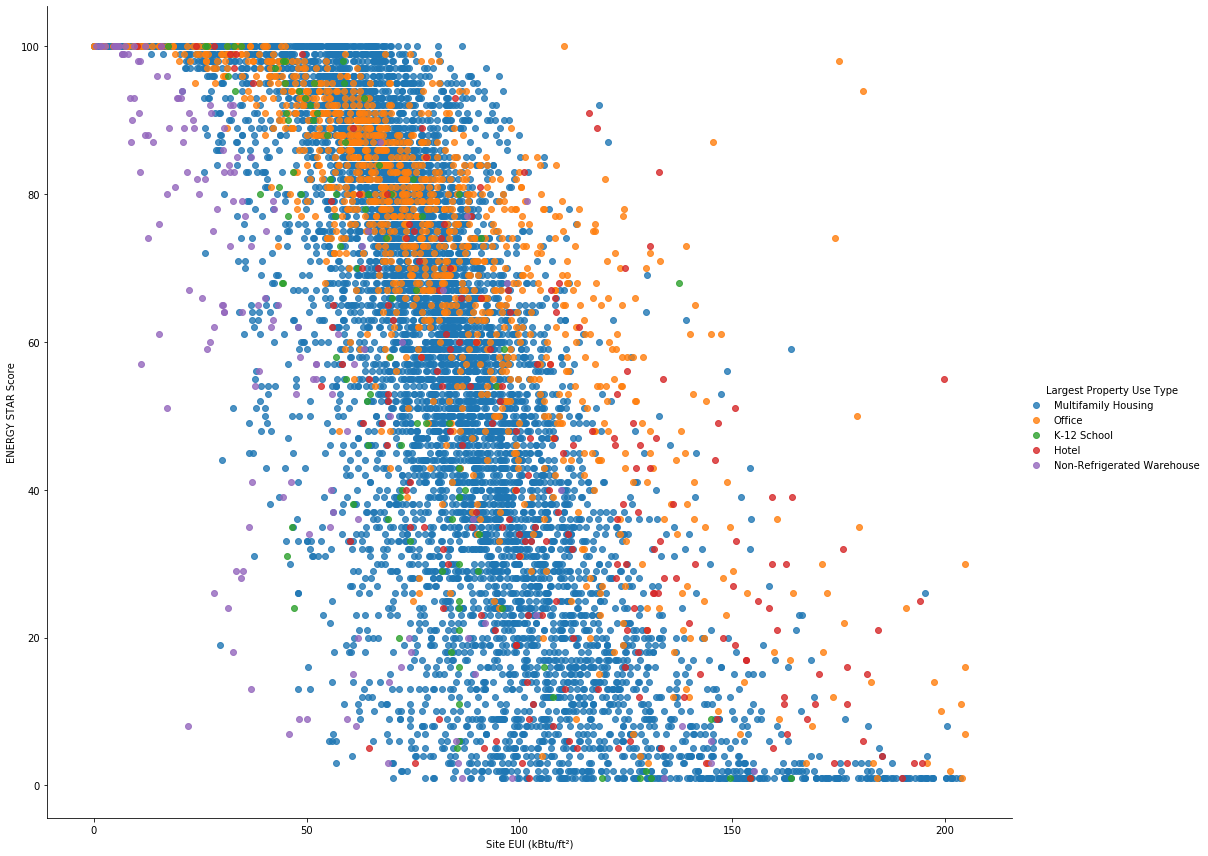

In [36]:
sns.lmplot('Site EUI (kBtu/ft²)','ENERGY STAR Score',
           data=features,fit_reg=False,hue='Largest Property Use Type',
          height=12, aspect=1.2
          )

To visualize relationships between two continuous variables, we use scatterplots. We can include additional information, such as a categorical variable, in the color of the points. Draw the following plot which will show the `Energy Star Score` vs. `Site EUI` colored by the `building type`:

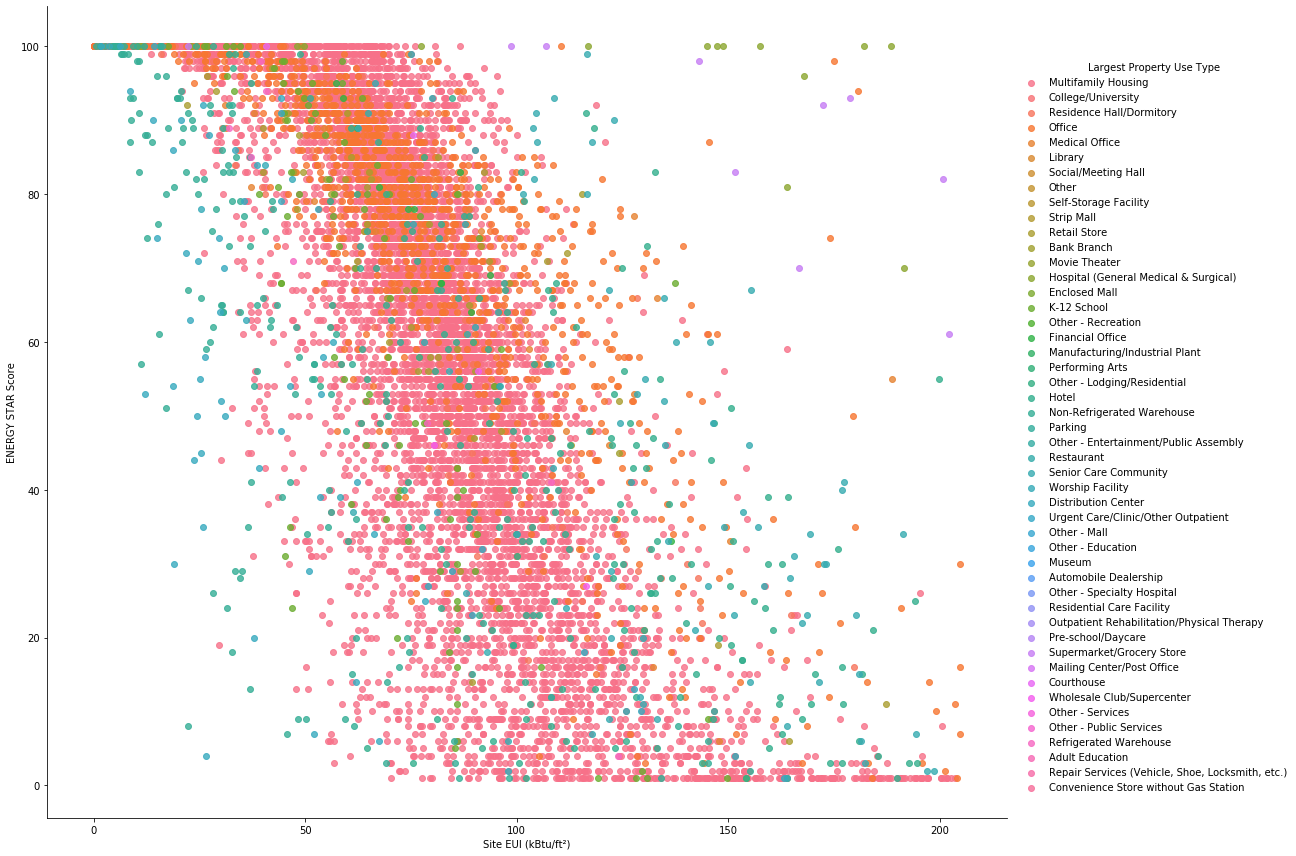

In [37]:
# Draw the Linear Regression plot between 'Site EUI (kBtu/ft²)' and 'ENERGY STAR Score' and Put a 
# Categorical Column 'Largest Property Use Type'
sns.lmplot('Site EUI (kBtu/ft²)','ENERGY STAR Score',
           data=data,fit_reg=False,hue='Largest Property Use Type',
          height=12, aspect=1.2
          )

In [38]:
# Draw a Pair Plot for 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
# 'Weather Normalized Source EUI (kBtu/ft²)', 
# 'Total GHG Emissions (Metric Tons CO2e)'
plot_data = data[['ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
'Weather Normalized Source EUI (kBtu/ft²)', 
'Total GHG Emissions (Metric Tons CO2e)']]
#plot_data

In [39]:
# Don't Forget to drop all null values from DataSet
plot_data = plot_data.dropna()

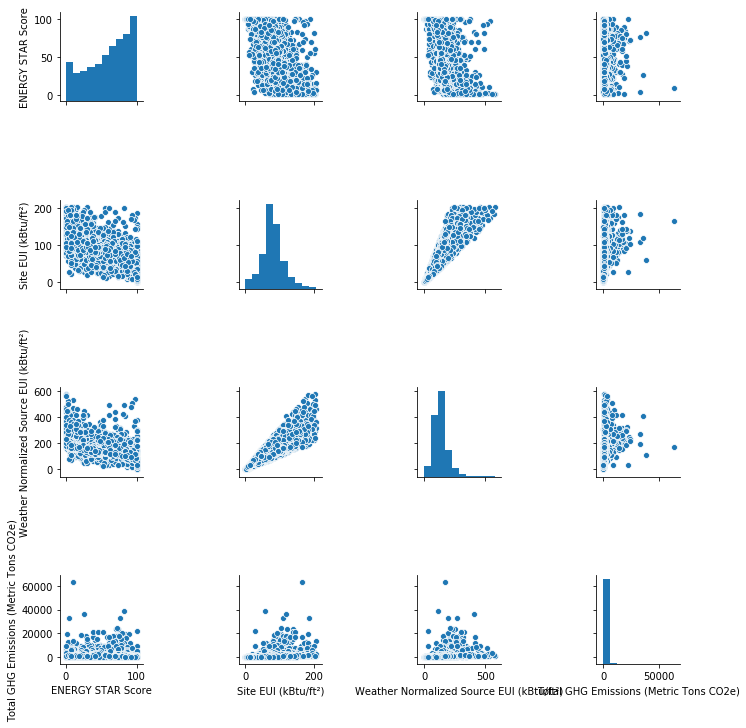

In [40]:
# Pair Plot using Seaborn
sns.pairplot(plot_data)

# 3. Feature Engineering and Selection

Before we get any further, we should define what feature engineering and selection are! These definitions are informal and have considerable overlap, but I like to think of them as two separate processes:
<br><br>
* [Feature Engineering](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/): The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as we can do log and square root for numerical variables(scaling), or one-hot encoding categorical variables so they can be used in a model. Generally, I think of feature engineering as adding additional features derived from the raw data.
<br><br>
* [Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/): The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the [most variance](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.



<b>For this project, we will take the following Feature Engineering steps:</b>
* Select only the `numerical variables` and `two categorical variables` ('borough' and 'property use type')


* `One-hot encode` `categorical variables` (borough and property use type)


* Add in the `natural log transformation` of the `numerical variables`

In [41]:
# Copy the original data

features = data.copy()

# Select the numeric columns
numerical_subset = features.select_dtypes('number')
categorical_subset = features[['Borough','Largest Property Use Type']]

# Create columns with log of numeric columns

for col in numerical_subset.columns:
    if col == 'ENERGY STAR Score':
        next
    else: 
        numerical_subset['log_'+ col] = np.log(numerical_subset[col])

C:\Users\iverson\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning:

invalid value encountered in log

C:\Users\iverson\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning:

divide by zero encountered in log



In [42]:
numerical_subset.head().transpose()

,12,17,18,19,20
Order,1.500000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01
Property Id,2.637863e+06,2.777309e+06,2.780056e+06,4.988574e+06,4.988569e+06
DOF Gross Floor Area,NaN,NaN,NaN,1.791300e+05,1.021500e+05
Largest Property Use Type - Gross Floor Area (ft²),4.125030e+05,3.230000e+05,3.214640e+05,2.047200e+05,1.167440e+05
Year Built,1.903000e+03,1.907000e+03,1.939000e+03,1.939000e+03,1.939000e+03
Number of Buildings - Self-reported,2.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
Occupancy,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
ENERGY STAR Score,9.300000e+01,NaN,7.200000e+01,6.700000e+01,8.000000e+01
Site EUI (kBtu/ft²),3.200000e+01,1.200000e+02,7.620000e+01,7.570000e+01,7.710000e+01
Weather Normalized Site EUI (kBtu/ft²),NaN,1.252000e+02,7.990000e+01,7.900000e+01,8.270000e+01


In [43]:
# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)


# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numerical_subset,categorical_subset],axis=1)

In [44]:
print(categorical_subset.shape)
print(numerical_subset.shape)

(11319, 53)
(11319, 57)


In [45]:
features.head().transpose()

,12,17,18,19,20
Order,15.0,20.0,21.0,22.0,23.0
Property Id,2637863.0,2777309.0,2780056.0,4988574.0,4988569.0
DOF Gross Floor Area,NaN,NaN,NaN,179130.0,102150.0
Largest Property Use Type - Gross Floor Area (ft²),412503.0,323000.0,321464.0,204720.0,116744.0
Year Built,1903.0,1907.0,1939.0,1939.0,1939.0
...,...,...,...,...,...
Largest Property Use Type_Strip Mall,0.0,0.0,0.0,0.0,0.0
Largest Property Use Type_Supermarket/Grocery Store,0.0,0.0,0.0,0.0,0.0
Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,0.0,0.0,0.0,0.0,0.0
Largest Property Use Type_Wholesale Club/Supercenter,0.0,0.0,0.0,0.0,0.0


In [46]:
# See the Shape of this new features DataFrame
features.shape

(11319, 110)

At this point, we have `11319 observations (buildings`) with `111 different features` (one column is the score). 

Not all of these features are likely to be useful for predicting the Energy Star Score, so now we will turn to <b>feature selection</b> to remove some of the variables.

<b>For this project, we will take the following Feature Selection steps:</b>
* Remove [collinear features](https://statinfer.com/204-1-9-issue-of-multicollinearity-in-python/)

Highly collinear features have a significant correlation coefficent between them. 

For example, in our dataset, the `Site EUI` and `Weather Norm EUI` are highly correlated because they are just slightly different means of calculating the energy use intensity.

Text(0.5, 1.0, 'Weather vs Site, R =0.9968')

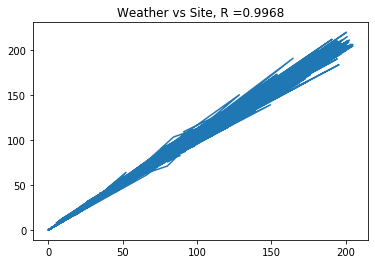

In [47]:
# draw a Plot for 'Weather Normalized Site EUI (kBtu/ft²)' VS 'Site EUI (kBtu/ft²)'
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)','Site EUI (kBtu/ft²)']].dropna()
plt.plot(plot_data['Site EUI (kBtu/ft²)'],plot_data['Weather Normalized Site EUI (kBtu/ft²)'])


plt.title('Weather vs Site, R =%0.4f' 
%np.corrcoef(
data[['Weather Normalized Site EUI (kBtu/ft²)','Site EUI (kBtu/ft²)']].dropna(),
rowvar=False)[0][1]   
        )



While variables in a dataset are usually correlated to a small degree, highly collinear variables can be redundant in the sense that we only need to retain one of the features to give our model the necessary information.

Removing collinear features is a method to `reduce model complexity` by `decreasing the number of features` and can help to `increase model generalization`. 

It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score.

<b>There are a number of methods to calculate collinearity between features, with one of the most common the [variance inflation factor](https://www.statisticshowto.datasciencecentral.com/variance-inflation-factor/). In this project, we will use thebcorrelation coefficient to identify and remove collinear features. We will drop one of a pair of features if the correlation coefficient between them is greater than `0.6`.</b>


Acknowledgement : adapted it from a [Stack Overflow answer](https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on/43104383#43104383)

In [48]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['ENERGY STAR Score']
    x = x.drop(columns = ['ENERGY STAR Score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [49]:
# Call function to Remove Collinear Feature with 0.6 Thrushold Limit
df = remove_collinear_features(features,0.6)
df.head()

C:\Users\iverson\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning:

invalid value encountered in greater_equal



,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Water Intensity (All Water Sources) (gal/ft²),...,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,score
12,15,2637863,NaN,1903,2,100,32.0,7.5,0.0,51.01,...,0,0,0,0,0,0,0,0,0,93.0
17,20,2777309,NaN,1907,7,100,120.0,8.7,0.9,NaN,...,0,0,0,0,0,0,0,0,0,NaN
18,21,2780056,NaN,1939,2,100,76.2,3.5,0.0,18.40,...,0,0,0,0,0,0,0,0,0,72.0
19,22,4988574,179130.0,1939,1,100,75.7,4.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,67.0
20,23,4988569,102150.0,1939,1,100,77.1,2.6,0.0,NaN,...,0,0,0,0,0,0,0,0,0,80.0


In [50]:
# Drop all column where we have NULL values
features = df.dropna(axis=1,how='all')

In [51]:
# Now see the Shape of the Features
features.shape

(11319, 65)

Our final dataset now has `64` features (`one of the columns is the target`). This is still quite a few, but mostly it is because we have one-hot encoded the categorical variables. 

Moreover, while a large number of features may be problematic for models such as linear regression, models such as the random forest perform implicit feature selection and automatically determine which features are important during traning.

<b>Additional Feature Selection</b>

There are plenty of more methods for [feature selection](https://scikit-learn.org/stable/modules/feature_selection.html). Some popular methods include [principal components analysis (PCA)](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf) which transforms the features into a reduced number of dimensions that preserve the greatest variance, or [independent components analysis (ICA)](http://cs229.stanford.edu/notes/cs229-notes11.pdf) which aims to find the independent sources in a set of features.

# 4. Split Into Training and Testing Sets

In machine learning, we always need to separate our features into two sets:

* `Training set` which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.



* `Testing set` which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world.

For our problem, we will first extract all the buildings without an Energy Star Score (we don't know the true answer for these buildings so they will not be helpful for training or testing). Then, we will split the buildings with an Energy Star Score into a testing set of 30% of the buildings, and a training set of 70% of the buildings.


Splitting the data into a random training and testing set is simple using scikit-learn. We can set the random state of the split to ensure consistent results.

In [52]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [53]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]
print(no_score.shape)
print(score.shape)
# Choose rather to impute or work only with not null values.

(1858, 65)
(9461, 65)


In [80]:
# Separate out the features and targets
features = score.drop(columns='score')
target = pd.DataFrame(score['score'])


# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf:np.nan,-np.inf:np.nan})

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 42)

# Print the Shape of the Training and Test DataSet
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


In [91]:
# Convert  y to One -dimensional Array (vector)
y_train = np.array(y_train).reshape((-1),) 
y_test = np.array(y_test).reshape((-1),)

In [92]:
target.head()

,score
12,93.0
18,72.0
19,67.0
20,80.0
21,100.0


# 1.1 Imputing Missing Values

There are a number of methods for imputation but here we will use the relatively simple method of replacing missing values with the median of the column. ([Here is a more thorough discussion on imputing missing values](http://www.stat.columbia.edu/~gelman/arm/missing.pdf))

In [93]:
from sklearn.impute import SimpleImputer

In [133]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(X_train) # find the null values to be transformed using the strategy 'median'

# Transform both training data and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [134]:
print('Missing values in training features: ', np.sum(np.isnan(X_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


For more sophisticated methods of imputation (although median values usually works well) check out [this article](https://www.tandfonline.com/doi/full/10.1080/1743727X.2014.979146)

# 1.2 Scaling Features

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. [Linear Regression and Random Forest do not require feature scaling](https://stats.stackexchange.com/questions/121886/when-should-i-apply-feature-scaling-for-my-data), but other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. For this reason, it is a best practice to scale features when we are comparing multiple algorithms.

There are two ways to [scale features](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html):

> For each value, subtract the mean of the feature and divide by the standard deviation of the feature. This is known as standardization and results in each feature having a mean of 0 and a standard deviation of 1.

> For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization.


In [96]:
from sklearn.preprocessing import StandardScaler
#or
from sklearn.preprocessing import MinMaxScaler

As with imputation, when we train the scaling object, we want to use only the training set. When we transform features, we will transform both the training set and the testing set.

In [135]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler()

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 5. Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

In [113]:
# import Machine Learning Model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR #regression for SVM
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [114]:
# To Evaluate R^2
from sklearn import metrics

In [136]:
def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train,y_train)
    # Make Prediction and Evaluate
    model_pred = model.predict(X_test)
    model_r2 = metrics.r2_score(y_test,model_pred)
    
    # Return the performance Metric
    return model_r2

In [152]:
lr = LinearRegression()
lr_r2 = fit_and_evaluate(lr)

print("Linear Regression Performance = %0.4f" % lr_r2)

Linear Regression Performance = -1039037940777.6632


In [148]:
svm = SVR(C= 1000,gamma = 'scale')
svm_r2 = fit_and_evaluate(svm)

print("Support Vector Regression Performance = %0.4f" %svm_r2)

Support Vector Regression Performance = -0.9108


In [147]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_r2 = fit_and_evaluate(knn)
print("K-Nearest Neighbors Regression Performance = %0.4f" %knn_r2)

K-Nearest Neighbors Regression Performance = -0.1077


In [146]:
random_forest = RandomForestRegressor(n_estimators=10)
random_forest_r2 = fit_and_evaluate(random_forest)
print("Random Forest Regression Performance = %0.4f" %random_forest_r2)

Random Forest Regression Performance = -2.8325


In [145]:
# Ensemble learning is not good for small set data (Gradient Boosted / Random Forest)
gradient_boost = GradientBoostingRegressor()
gradient_boost_r2 = fit_and_evaluate(gradient_boost) 
print("Gradient Boosted Regression Performance = %0.4f" %gradient_boost_r2)

Gradient Boosted Regression Performance = -3.7847


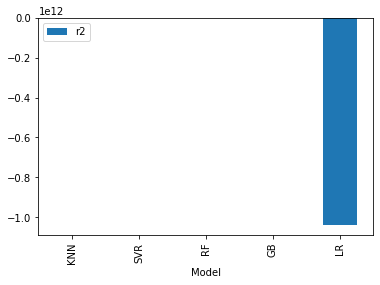

In [144]:
model_comparison = pd.DataFrame(
                                {
                                    'Model' : ['LR','SVR','KNN','RF','GB'],
                                    'r2':[lr_r2,svm_r2,knn_r2,random_forest_r2,gradient_boost_r2]
                                }
)
model_comparison.sort_values('r2',ascending=False).plot(x='Model',y='r2',kind='bar')

# 6. Model Optimization

In [139]:
# K-fold Cross Validation (bias variance tradeoff)
# Grid Search (Choose Optimal Values for Hyperparameters)

# 3 data sets : Train, Test, Validation

In [140]:
# Overfitting - high variance model (Model memorize the training data sets)
# Underfitting - High Bias model (Don't have enough degree of freedom to learn the mapping from features to target)

In [141]:
from sklearn.model_selection import cross_val_score

In [153]:
accuracies = cross_val_score(random_forest,X_train,y_train,cv=10,n_jobs=-1)

In [154]:
accuracies

array([0.77744011, 0.80635075, 0.77711118, 0.80087257, 0.79879825,
       0.79976304, 0.75715369, 0.76236718, 0.76158587, 0.79456111])

In [150]:
accuracies.mean()

0.7833341744589047

In [151]:
accuracies.std()

0.020097329527087718

In [157]:
from sklearn.model_selection import GridSearchCV

In [159]:
# parameter-> reduce when train hyper-parameter=> given by ourselves
parameter =[{'min_samples_leaf':[1,2,3,4,5],'n_estimators': [100,120,200,250]}]
grid_search = GridSearchCV(random_forest,param_grid=parameter,cv=5,n_jobs=-1)

In [160]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'min_samples_leaf': [1, 2, 3, 4, 5],

In [161]:
best_score = grid_search.best-score_
best_param = grid_search.best-params

AttributeError: 'GridSearchCV' object has no attribute 'best'

In [ ]:
#check best score
best_score

In [ ]:
#check best param
best_param

# 7. Inteprete the model
* feature importance
* Locally interpretable model-agnostic explainer (LIME)
* explanation. Why I should trust you ??

In [ ]:
feature_results = feature_results.sort_values('importance',ascending=False)

# 8.Pipelining